In [1]:
import pandas_datareader as pdr

In [2]:
import datetime as dt

In [35]:
# Load data

stock = 'KCE'
start = dt.datetime(2019,1,1)
end = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(stock,start)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,47.770000,47.250000,47.599998,47.770000,11800.0,45.144661
2019-01-02,48.220001,47.770000,47.820000,47.970001,4000.0,45.333672
2019-01-03,47.820000,47.000000,47.549999,47.000000,4600.0,44.416977
2019-01-04,48.860001,47.970001,47.970001,48.709999,4600.0,46.032993
2019-01-07,49.250000,48.279999,48.279999,48.830002,5500.0,46.146404


In [36]:
data.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03'],
              dtype='datetime64[ns]', name='Date', length=675, freq=None)

In [37]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-30,100.500000,99.589996,100.500000,99.589996,1160000.0,99.589996
2021-08-31,100.339996,99.440002,100.339996,99.570000,1380000.0,99.570000
2021-09-01,100.540001,98.959999,99.830002,99.889999,3670000.0,99.889999
2021-09-02,100.680000,100.250000,100.269997,100.370003,1140000.0,100.370003
2021-09-03,100.589996,100.010002,100.449997,100.059998,1060000.0,100.059998


In [38]:
data.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [39]:
data2 = pdr.get_data_stooq(stock,start)
data2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-09-24,96.95,97.7438,96.950,97.5164,6571
2021-09-23,96.13,97.6067,96.130,97.2700,8442
2021-09-22,94.66,95.5300,94.660,95.3343,5755
2021-09-21,94.72,95.0943,93.705,93.9900,64317
2021-09-20,95.11,95.1100,93.100,94.1100,25724


In [40]:
nas =pdr.get_nasdaq_symbols()

In [41]:
nas.loc['KCE']

Nasdaq Traded                               True
Security Name       SPDR S&P Capital Markets ETF
Listing Exchange                               P
Market Category                                 
ETF                                         True
Round Lot Size                             100.0
Test Issue                                 False
Financial Status                             NaN
CQS Symbol                                   KCE
NASDAQ Symbol                                KCE
NextShares                                 False
Name: KCE, dtype: object

In [42]:
len(nas)

11184

In [43]:
nas.head()

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
A,True,"Agilent Technologies, Inc. Common Stock",N,,False,100.0,False,NaN,A,A,False
AA,True,Alcoa Corporation Common Stock,N,,False,100.0,False,NaN,AA,AA,False
AAA,True,Listed Funds Trust AAF First Priority CLO Bond...,P,,True,100.0,False,NaN,AAA,AAA,False
AAAU,True,Goldman Sachs Physical Gold ETF Shares,P,,True,100.0,False,NaN,AAAU,AAAU,False
AAC,True,Ares Acquisition Corporation Class A Ordinary ...,N,,False,100.0,False,NaN,AAC,AAC,False


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [45]:
# Prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [46]:
prediction_days = 60

x_train=[]
y_train=[]

for x in range (prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [47]:
# Build the model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next closing value

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)

'''Test the Model Accuracy on Existing Data'''

Epoch 1/25
20/20 [==============================] - 7s 123ms/step - loss: 0.0757
Epoch 2/25
20/20 [==============================] - 3s 127ms/step - loss: 0.0097
Epoch 3/25
20/20 [==============================] - 3s 133ms/step - loss: 0.0055
Epoch 4/25
20/20 [==============================] - 2s 117ms/step - loss: 0.0048
Epoch 5/25
20/20 [==============================] - 2s 102ms/step - loss: 0.0049
Epoch 6/25
20/20 [==============================] - 2s 101ms/step - loss: 0.0052
Epoch 7/25
20/20 [==============================] - 2s 102ms/step - loss: 0.0045
Epoch 8/25
20/20 [==============================] - 2s 101ms/step - loss: 0.0043
Epoch 9/25
20/20 [==============================] - 2s 102ms/step - loss: 0.0042
Epoch 10/25
20/20 [==============================] - 2s 101ms/step - loss: 0.0039
Epoch 11/25
20/20 [==============================] - 2s 102ms/step - loss: 0.0041 1
Epoch 12/25
20/20 [==============================] - 2s 101ms/step - loss: 0.0037
Epoch 13/25
20/20 [====

'Test the Model Accuracy on Existing Data'

In [48]:
# Load Test data
test_start=dt.datetime(2020,1,1)
test_end=dt.datetime.now()

test_data=web.DataReader(stock,'yahoo',test_start,test_end)
actual_prices=test_data['Close'].values

total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)

In [50]:
# Make predictions on Test data
x_test=[]

for x in range (prediction_days,len(model_inputs)) :
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

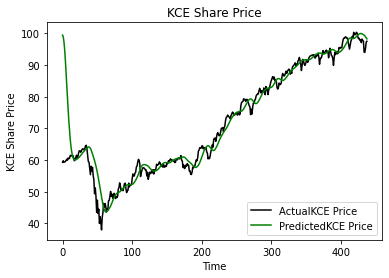

In [51]:
# plot the test predictions
plt.plot(actual_prices,color='black',label=f'Actual{stock} Price')
plt.plot(predicted_prices,color='green',label=f'Predicted{stock} Price')
plt.title(f'{stock} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{stock} Share Price')

plt.legend()
plt.show()

In [52]:
# Predict Next day

real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print (f'Prediction: {prediction}')

Prediction: [[97.99923]]
